<a href="https://colab.research.google.com/github/averrise/averrise.github.io/blob/master/_post/fastai%26pytorch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.collab import *

In [2]:

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
!pip install kaggle

In [4]:
creds = '{"username":"gimottiyamettee","key":"09caa961fe7ad533f01c64d2e6c9d218"}'

In [5]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.write_text(creds)
  cred_path.chmod(0o600)

In [6]:
from fastai.data.external import URLs

path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [7]:
def file_extract(fname, dest=None):
     "Extract `fname` to `dest` using `tarfile` or `zipfile`."
     if dest is None: dest = Path(fname).parent
     fname = str(fname)
     if   fname.endswith('gz'):  tarfile.open(fname, 'r:gz').extractall(dest)
     elif fname.endswith('zip'): zipfile.ZipFile(fname     ).extractall(dest)
     else: raise Exception(f'Unrecognized archive: {fname}')

In [8]:
from kaggle import api

if not path.exists():
  path.mkdir(parents=True)
  api.competition_download_cli('bluebook-for-bulldozers', path=path)

path.ls(file_type='text')

100%|██████████| 48.4M/48.4M [00:02<00:00, 25.3MB/s]

(#0) []

In [9]:
path.ls()

(#1) [Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip')]

In [10]:
import shutil

# 해제할 zip 파일 경로
zip_file_path = "/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip"

# 해제될 디렉토리 경로
extracted_path = path

# zip 파일 해제
shutil.unpack_archive(zip_file_path, extracted_path, 'zip')

print("Zip file extracted:", zip_file_path)


Zip file extracted: /root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip


In [11]:
path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/Valid.7z'),Path('/root/.fastai/archive/bluebook/TrainAndValid.7z'),Path('/root/.fastai/archive/bluebook/Data Dictionary.xlsx'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/Train.7z'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv'),Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv')...]

In [12]:
import pandas as pd

df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [13]:
from fastai.tabular.all import *

df = add_datepart(df, 'saledate')

In [14]:
sizes = 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact'

df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace = True)

<ipython-input-14-46d355ea9a5c>:4: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace = True)


In [15]:
import numpy as np


dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

In [16]:
df_test = pd.read_csv(path/'Test.csv', low_memory = False)
df_test = add_datepart(df_test, 'saledate')

In [17]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [18]:
print(df.columns)

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [19]:
procs = [Categorify, FillMissing]

In [20]:
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx), list(valid_idx))

In [21]:
cont, cat = cont_cat_split(df, 1, dep_var = dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits = splits)

In [22]:
len(to.train), len(to.valid)

(404710, 7988)

In [23]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [24]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,298,43,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,529,57,98,0,3,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,111,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,1,1,1,1,1,1,1.077754e+09,1,1


In [25]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [26]:
from pathlib import Path
import pickle

with open(path/'to.pkl', 'wb') as f:
    pickle.dump(to, f)

In [27]:
with open(path/'to.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)

        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246  11.097410     999089     3157         121           3.0   
1       1139248  10.950807     117657       77         121           3.0   
2       1139249   9.210340     434808     7009         121           3.0   
3       1139251  10.558414    1026470      332         121           3.0   
4       1139253   9.305651    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
401120  6333336   9.259130    1840702    21439         149           1.0   
401121  6333337   9.305651    1830472    21439         149           1.0   
401122  6333338   9.350102    1887659    21439         149           1.0   
401123  6333341   9.104980    1903570    21435         149           2.0   
401124  6333342   8.955448    1926965    21435         149           2.0   

        YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  \
0           2004 

In [28]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [29]:
from sklearn.tree import DecisionTreeRegressor

m = DecisionTreeRegressor(max_leaf_nodes = 4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

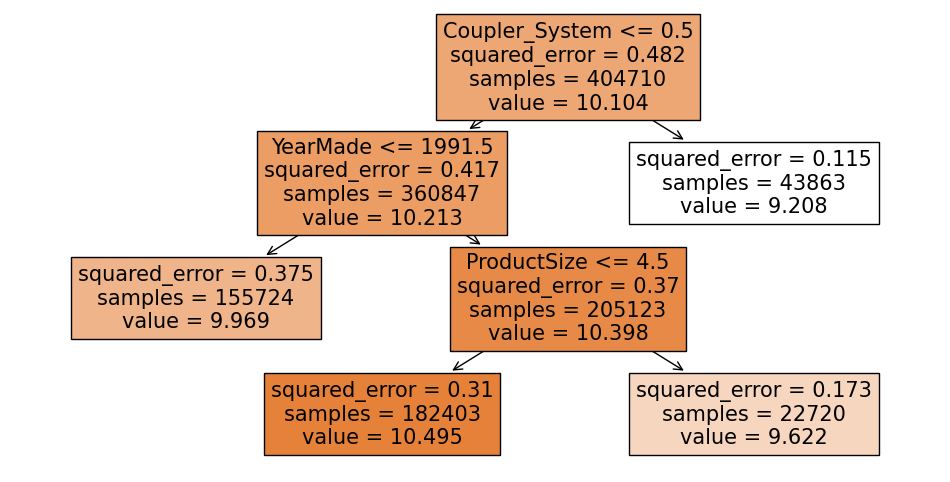

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(m, filled=True, feature_names=xs.columns)
plt.show()

In [31]:
pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00


In [32]:
pip install graphviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


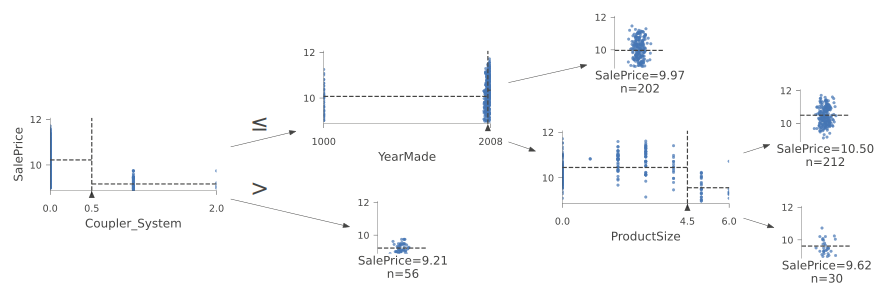

In [33]:
import dtreeviz

samp_idx = np.random.permutation(len(y))[:500]

viz_model=dtreeviz.model(m,
                         X_train=xs.iloc[samp_idx],
                         y_train=y.iloc[samp_idx],
                         feature_names=xs.columns,
                         target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
               orientation='LR')

In [34]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


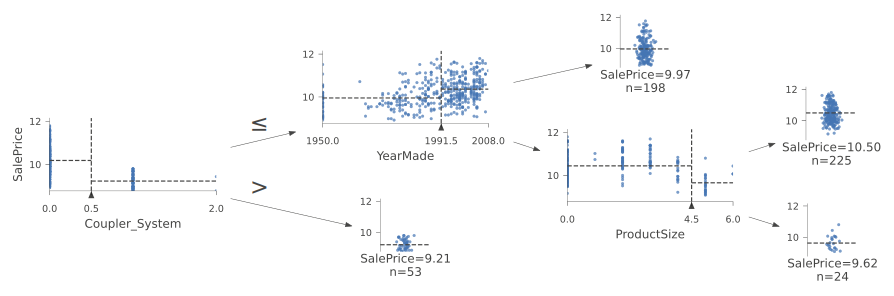

In [35]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)


samp_idx = np.random.permutation(len(y))[:500]

viz_model=dtreeviz.model(m,
                         X_train=xs.iloc[samp_idx],
                         y_train=y.iloc[samp_idx],
                         feature_names=xs.columns,
                         target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
               orientation='LR')

In [36]:
m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [37]:
def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

m_rmse(m, xs, y)

0.0

In [38]:
xs

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
0,2,963,298,43,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,1,1,1,1,1,1,1,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09
1,2,1745,529,57,98,0,3,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,1,1,1,1,1,1,1,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09
2,1,336,111,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09
3,1,3716,1381,0,45,0,4,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1139251,1026470,332,121,3.0,2001,3486.0,2011,5,20,19,3,139,1.305763e+09
4,3,4261,1538,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1139253,1057373,17311,121,3.0,2007,722.0,2009,7,30,23,3,204,1.248307e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,0,490,160,108,0,0,5,13,44,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333344,1919201,21435,149,2.0,2005,0.0,2012,3,10,7,2,67,1.331078e+09
412694,0,491,160,108,63,0,5,17,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333345,1882122,21436,149,2.0,2005,0.0,2012,1,4,28,5,28,1.327709e+09
412695,0,490,160,108,0,0,5,13,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333347,1944213,21435,149,2.0,2005,0.0,2012,1,4,28,5,28,1.327709e+09
412696,0,490,160,108,0,0,5,13,44,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,1,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333348,1794518,21435,149,2.0,2006,0.0,2012,3,10,7,2,67,1.331078e+09


In [39]:
y

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259130
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 404710, dtype: float32

In [40]:
valid_xs

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
22915,2,2301,706,43,0,0,3,48,23,5,5,0,1,0,0,0,0,6,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,5,0,0,1,1,1,1,1,1,1,1,1218822,1024652,4124,121,3.0,1950,6240.0,2011,10,40,3,0,276,1.317600e+09
22916,3,278,101,50,0,17,0,2,48,1,1,2,6,1,2,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218823,1067601,24808,121,3.0,2006,1802.0,2011,10,40,6,3,279,1.317859e+09
22917,3,4514,1684,0,0,0,0,41,48,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218824,1010582,9580,121,3.0,2006,1926.0,2011,10,40,6,3,279,1.317859e+09
22918,2,4213,1498,0,0,0,0,44,1,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218825,1026609,6270,121,3.0,2003,1340.0,2011,10,40,6,3,279,1.317859e+09
22919,3,4647,1772,21,0,0,0,1,1,1,1,2,6,1,2,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218826,1032638,17976,121,3.0,2007,2297.0,2011,10,40,6,3,279,1.317859e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,0,666,209,108,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333336,1840702,21439,149,1.0,2005,0.0,2011,11,44,2,2,306,1.320192e+09
401121,0,666,209,108,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333337,1830472,21439,149,1.0,2005,0.0,2011,11,44,2,2,306,1.320192e+09
401122,0,666,209,108,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333338,1887659,21439,149,1.0,2005,0.0,2011,11,44,2,2,306,1.320192e+09
401123,0,490,160,108,0,0,5,13,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333341,1903570,21435,149,2.0,2005,0.0,2011,10,43,25,1,298,1.319501e+09


In [41]:
import pandas as pd

def remove_column(df, column_name):
    if column_name in df.columns:
        df = df.drop(column_name, axis=1)
    return df

# 'tearmade' 열을 삭제한 후의 데이터프레임을 얻습니다.
valid_xs = remove_column(valid_xs, 'TearMade')

In [42]:
valid_xs

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
22915,2,2301,706,43,0,0,3,48,23,5,5,0,1,0,0,0,0,6,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,5,0,0,1,1,1,1,1,1,1,1,1218822,1024652,4124,121,3.0,1950,6240.0,2011,10,40,3,0,276,1.317600e+09
22916,3,278,101,50,0,17,0,2,48,1,1,2,6,1,2,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218823,1067601,24808,121,3.0,2006,1802.0,2011,10,40,6,3,279,1.317859e+09
22917,3,4514,1684,0,0,0,0,41,48,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218824,1010582,9580,121,3.0,2006,1926.0,2011,10,40,6,3,279,1.317859e+09
22918,2,4213,1498,0,0,0,0,44,1,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218825,1026609,6270,121,3.0,2003,1340.0,2011,10,40,6,3,279,1.317859e+09
22919,3,4647,1772,21,0,0,0,1,1,1,1,2,6,1,2,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1218826,1032638,17976,121,3.0,2007,2297.0,2011,10,40,6,3,279,1.317859e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,0,666,209,108,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333336,1840702,21439,149,1.0,2005,0.0,2011,11,44,2,2,306,1.320192e+09
401121,0,666,209,108,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333337,1830472,21439,149,1.0,2005,0.0,2011,11,44,2,2,306,1.320192e+09
401122,0,666,209,108,63,0,5,17,20,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333338,1887659,21439,149,1.0,2005,0.0,2011,11,44,2,2,306,1.320192e+09
401123,0,490,160,108,0,0,5,13,9,4,4,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,1,1,1,1,1,1,1,2,6333341,1903570,21435,149,2.0,2005,0.0,2011,10,43,25,1,298,1.319501e+09


In [43]:
valid_y

22915     10.043249
22916     10.085809
22917      9.392662
22918      8.853665
22919     10.126631
            ...    
401120     9.259130
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 7988, dtype: float32

In [44]:
m_rmse(m, valid_xs, valid_y)

0.334828

In [45]:
m.get_n_leaves(), len(xs)

(324575, 404710)

In [46]:
m = DecisionTreeRegressor(min_samples_leaf = 25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.248563, 0.323365)

In [47]:
m.get_n_leaves()

12397

In [48]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators = 40, max_samples = 200000, max_features = 0.5, min_samples_leaf = 5, **kwargs):
  return RandomForestRegressor(n_jobs = -1, n_estimators = n_estimators,
                               max_samples = max_samples, max_features = max_features,
                               min_samples_leaf = min_samples_leaf, oob_score = True).fit(xs, y)

In [49]:
m = rf(xs, y)

In [50]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.171131, 0.232798)

In [51]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X 

In [52]:
r_mse(preds.mean(0), valid_y)

0.232798

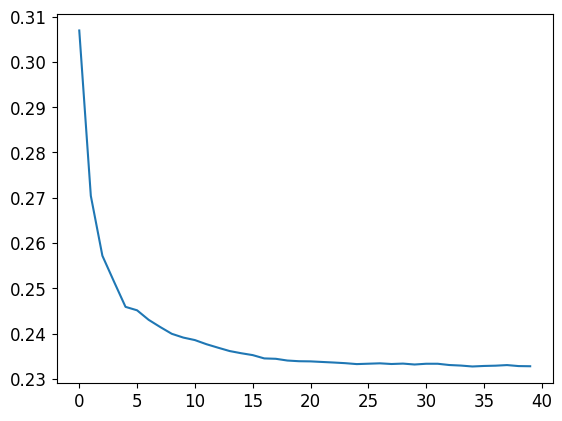

In [53]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [54]:
r_mse(m.oob_prediction_, y)

0.210939

In [55]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

preds.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X 

(40, 7988)

In [56]:
preds_std = preds.std(0)

In [57]:
preds_std[:5]

array([0.29284004, 0.14452593, 0.1000865 , 0.2326239 , 0.1348687 ])

In [58]:
def rf_feat_importance(m, df):
  return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [59]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.181695
6,ProductSize,0.127156
30,Coupler_System,0.112322
7,fiProductClassDesc,0.071572
31,Grouser_Tracks,0.056575
54,ModelID,0.054305
65,saleElapsed,0.049643
3,fiSecondaryDesc,0.041431
32,Hydraulics_Flow,0.037350
1,fiModelDesc,0.030163


<Axes: ylabel='cols'>

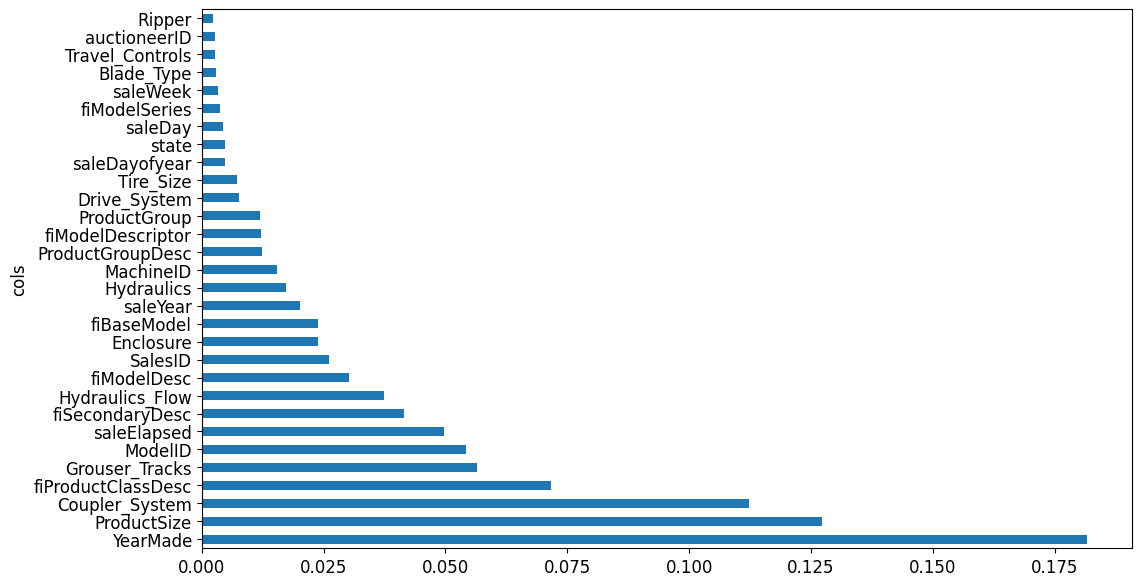

In [60]:
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize = (12, 7), legend = False)

plot_fi(fi[:30])

In [61]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

In [62]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y)

In [63]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181445, 0.230888)

In [64]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

<Axes: ylabel='cols'>

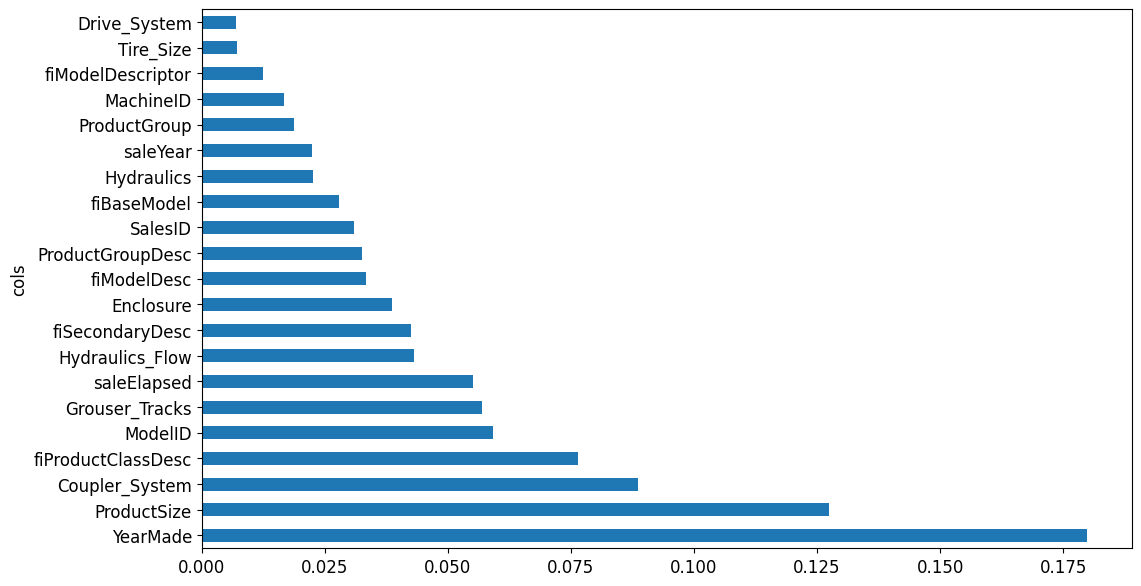

In [65]:
plot_fi(rf_feat_importance(m, xs_imp))

In [66]:
def get_oob(df):
  m = RandomForestRegressor(n_estimators=40, min_samples_leaf = 15,
                            max_samples=50000, max_features=0.5, n_jobs= -1, oob_score=True)
  m.fit(df, y)
  return m.oob_score_

In [67]:
get_oob(xs_imp)

0.8770244406852692

In [68]:
{c: get_oob(xs_imp.drop(c, axis = 1)) for c in ('saleYear', 'saleElapsed', 'ProductGroupDesc', 'ProductGroup',
                                                'fiModelDesc', 'fiBaseModel',
                                                'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'saleYear': 0.87572114827891,
 'saleElapsed': 0.8725358121613634,
 'ProductGroupDesc': 0.8773445262798308,
 'ProductGroup': 0.8769750870618541,
 'fiModelDesc': 0.876341927017595,
 'fiBaseModel': 0.8758066427187969,
 'Hydraulics_Flow': 0.8773084385799244,
 'Grouser_Tracks': 0.8772453050452245,
 'Coupler_System': 0.8779665748884293}

In [69]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis = 1))

0.8743162045835808

In [70]:
xs_final = xs_imp.drop(to_drop, axis = 1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis = 1)

In [71]:
import pandas as pd

# xs_final과 valid_xs_final을 DataFrame으로 변환한 후 저장
xs_final_df = pd.DataFrame(xs_final)
valid_xs_final_df = pd.DataFrame(valid_xs_final)

# DataFrame을 파일로 저장
xs_final_df.to_pickle(path/'xs_final.pkl')
valid_xs_final_df.to_pickle(path/'valid_xs_final.pkl')

In [72]:
import pandas as pd

# Pickle 파일로부터 데이터 불러오기
loaded_xs_final_df = pd.read_pickle(path/'xs_final.pkl')
loaded_valid_xs_final_df = pd.read_pickle(path/'valid_xs_final.pkl')

# 불러온 데이터 확인
print(loaded_xs_final_df.head())
print(loaded_valid_xs_final_df.head())

   YearMade  ProductSize  Coupler_System  fiProductClassDesc  ModelID  \
0      2004            0               0                  59     3157   
1      1996            3               0                  62       77   
2      2001            0               1                  39     7009   
3      2001            4               0                   8      332   
4      2007            0               1                  40    17311   

    saleElapsed  fiSecondaryDesc  Hydraulics_Flow  fiModelDesc  SalesID  \
0  1.163635e+09               43                0          963  1139246   
1  1.080259e+09               57                0         1745  1139248   
2  1.077754e+09                0                3          336  1139249   
3  1.305763e+09                0                0         3716  1139251   
4  1.248307e+09                0                3         4261  1139253   

   Enclosure  Hydraulics  MachineID  fiModelDescriptor  ProductGroup  \
0          3           1     999089   

In [73]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y),m_rmse(m, valid_xs_final, valid_y)

(0.183358, 0.23322)

([<matplotlib.axis.YTick at 0x7bab703e73d0>,
 [Text(0, 0, '#na#'),
  Text(0, 1, 'Large'),
  Text(0, 2, 'Large / Medium'),
  Text(0, 3, 'Medium'),
  Text(0, 4, 'Small'),
  Text(0, 5, 'Mini'),
  Text(0, 6, 'Compact')])

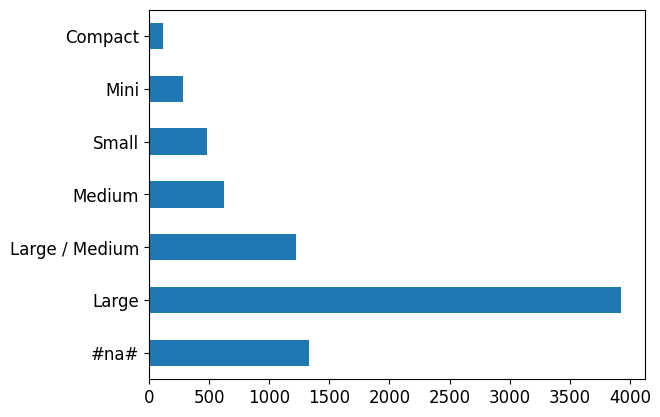

In [74]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c)

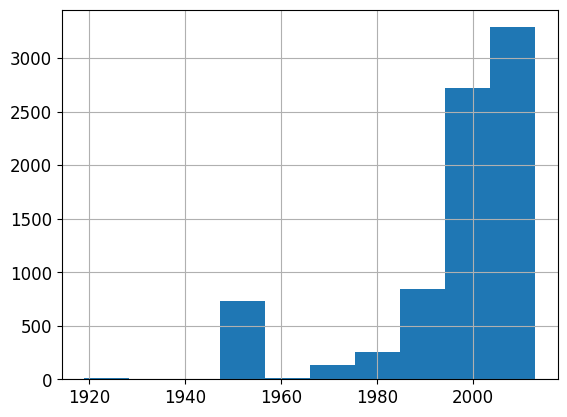

In [75]:
ax = valid_xs_final['YearMade'].hist()

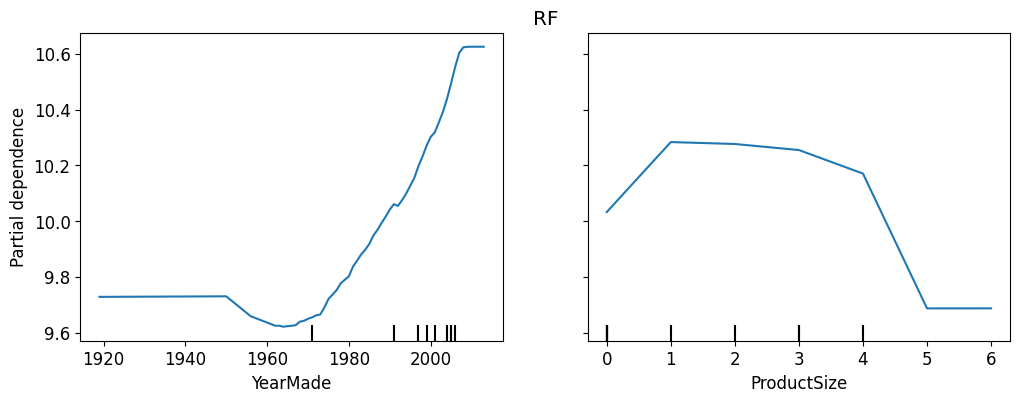

In [76]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("RF")
tree_disp = PartialDependenceDisplay.from_estimator(m, valid_xs_final, ["YearMade", "ProductSize"], ax=ax)


In [77]:
!pip install treeinterpreter
!pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3388 sha256=5e8699fffe84f8932043118e20860f6cc1972c6079d5854ad12fea273e9fb47b
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


In [78]:
row = valid_xs_final.iloc[:5]

In [79]:
from treeinterpreter import treeinterpreter as ti


prediction, bias, contributions = ti.predict(m, row.values)

In [80]:
prediction[0], bias[0], contributions[0].sum()

(array([9.94980034]), 10.104301266045688, -0.15450092852437286)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

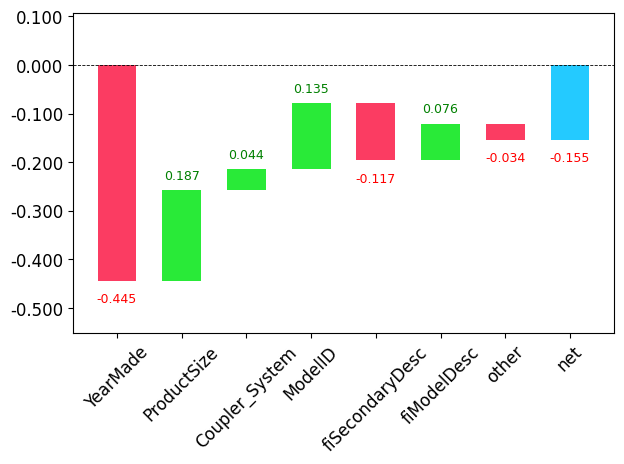

In [81]:
from waterfall_chart import plot as waterfall

waterfall(valid_xs_final.columns, contributions[0], threshold = 0.08,
          rotation_value=45, formatting = '{:,.3f}')

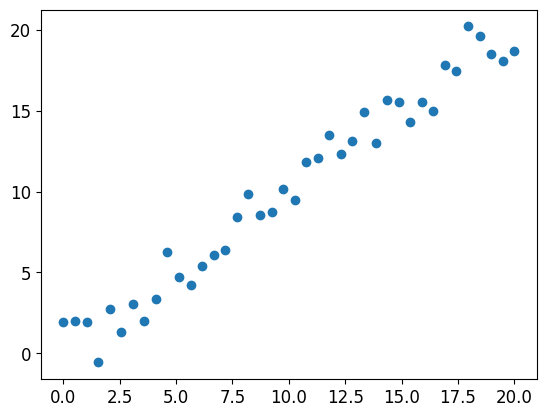

In [82]:
x_lin = torch.linspace(0,20, steps = 40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin)

In [83]:
xs_lin = x_lin.unsqueeze(1)

In [84]:
x_lin.shape, xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [85]:
m_lin = RandomForestRegressor().fit(xs_lin[:30], y_lin[:30])

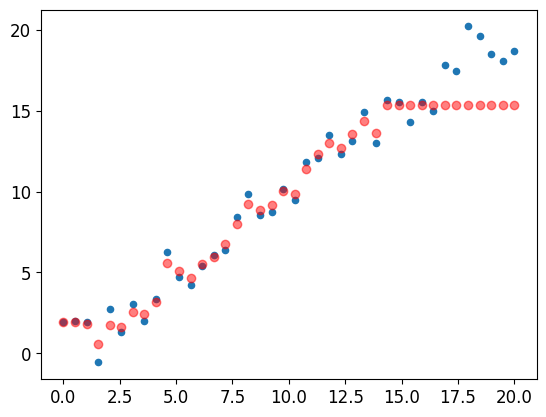

In [86]:
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color = 'red', alpha = 0.5)

In [87]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid  = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.856271
9,SalesID,0.122216
12,MachineID,0.016026
0,YearMade,0.002096
4,ModelID,0.000650
8,fiModelDesc,0.000559


In [88]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID', 'saleElapsed', 'MachineID'):
  m = rf(xs_final.drop(c,axis=1),y)
  print(c, m_rmse(m, valid_xs_final.drop(c, axis=1), valid_y))

orig 0.232301
SalesID 0.230711
saleElapsed 0.235391
MachineID 0.230662


In [89]:
time_vars = ['SalesID', 'MachineID']
xs_final_time = xs_final.drop(time_vars, axis = 1)
valid_xs_time = valid_xs_final.drop(time_vars, axis = 1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229058

<Axes: >

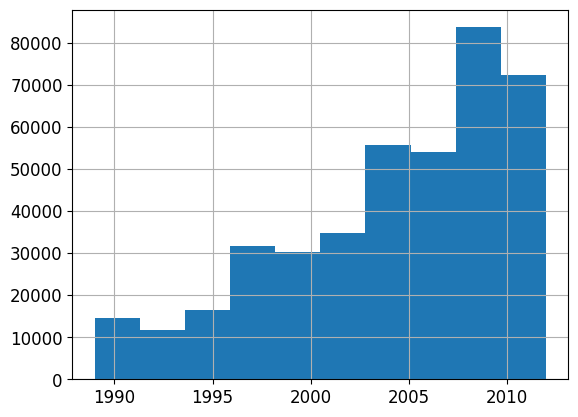

In [90]:
xs['saleYear'].hist()

In [91]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177549, 0.229443)

In [92]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

<ipython-input-92-d9f744b6e718>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.


In [93]:
df_nn_final = df_nn[list(xs_final.columns) +[dep_var]].copy()

In [94]:
df_nn_final[dep_var] = df_nn_final[dep_var].astype(np.float32)

In [95]:
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [96]:
cat_nn

['YearMade',
 'ProductSize',
 'Coupler_System',
 'fiProductClassDesc',
 'ModelID',
 'fiSecondaryDesc',
 'Hydraulics_Flow',
 'fiModelDesc',
 'Enclosure',
 'Hydraulics',
 'fiModelDescriptor',
 'ProductGroup',
 'Drive_System',
 'Tire_Size']

In [126]:
cont_nn.append('saleElapsed')

In [130]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis = 1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis = 1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)


(0.176678, 0.230236)

In [133]:
df_nn_final.dtypes

YearMade                 int64
ProductSize           category
Coupler_System          object
fiProductClassDesc      object
ModelID                  int64
saleElapsed            float64
fiSecondaryDesc         object
Hydraulics_Flow         object
fiModelDesc             object
SalesID                  int64
Enclosure               object
Hydraulics              object
MachineID                int64
fiModelDescriptor       object
ProductGroup            object
Drive_System            object
Tire_Size               object
SalePrice              float32
dtype: object

In [134]:
cat_nn

['YearMade',
 'ProductSize',
 'Coupler_System',
 'fiProductClassDesc',
 'ModelID',
 'fiSecondaryDesc',
 'Hydraulics_Flow',
 'fiModelDesc',
 'Enclosure',
 'Hydraulics',
 'ProductGroup',
 'Drive_System',
 'Tire_Size']

In [135]:
dep_var

'SalePrice'

In [137]:
from fastai.tabular.all import *

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn, y_names='SalePrice',  splits=splits)


In [138]:
dls = to_nn.dataloaders(1024)

In [139]:
y = to_nn.train.y
y.min(), y.max()

(8.465899, 11.863583)

SuggestedLRs(valley=0.0003981071640737355)

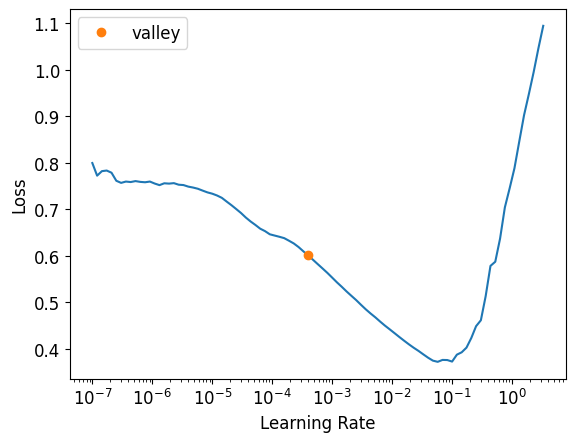

In [140]:
learn = tabular_learner(dls, y_range=(8,12), layers = [500, 250],
                        n_out = 1, loss_func = F.mse_loss)
learn.lr_find()

In [141]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.062732,0.064066,00:22
1,0.054609,0.060939,00:22
2,0.047934,0.054239,00:21
3,0.043226,0.052213,00:28
4,0.040048,0.051202,00:26


In [142]:
preds, targs = learn.get_preds()
r_mse(preds, targs)

0.22628

In [143]:
learn.save('nn')

Path('models/nn.pth')

In [145]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze())+ rf_preds) / 2

In [146]:
r_mse(ens_preds, valid_y)

0.221917